In [1]:
# visualisation
import matplotlib.pyplot as plt

# data analysis
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split

# style
sns.set_theme(style='whitegrid', palette='deep')

In [2]:
train = pd.read_csv('Data/train.csv') 
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data Exploration

In [3]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The above statistical summary reports 7 features (columns). Most of these features are self explanatory in what data they contain, except for perhaps SibSp and Parch. SibSp stands for Siblings/Spouses aboard the ship. Parch represents the number of Parents/Children aboard.
A quick observation of the Survived features mean tells that about 38% of the people in the training set survived the event.

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


The info function in Pandas prints information about a DataFrame including the index dtype and columns, non-null values and memory usage. For the train set, there are 7 integer based features (2 floats and 5 ints). This explains why the train.describe() line above only reported 7 features, as it ignores any feature that is not a numeric data type. There are 5 object data types. There appear to be some features with null values.

The next part shows the percentage of null values in all the features in the train set. The Age feature has about 20% null values, the Cabin has 77%, while the Embarked only 0.2%.

In [5]:
train.isnull().sum() * 100 / len(train)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

Missing data samples in the train set can be dealt with by dropping any row with missing samples. However, this is wasting potential useful data. Machine learning models need data for training to perform well. So is possible we should attempt to preserve the data and make use of it as much as we can.
Pandas has an interpolate() function which can be used here. Interpolation is a type of estimation. New data points are generated within a range of known data points.

In [6]:
train['Age'] = train['Age'].interpolate()
train.isnull().sum() * 100 / len(train)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

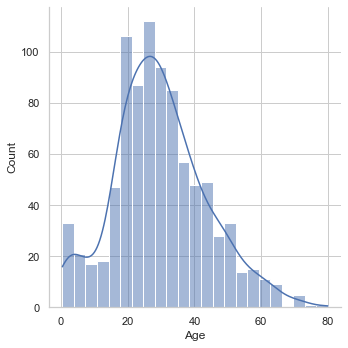

In [7]:
sns.displot(train['Age'], kde=True)